# Time Series Analysis using Dataset Sales

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams

In [3]:
#Read csv from github
data=pd.read_csv('https://raw.githubusercontent.com/fadli-im/ASTRA-Time-Series-Analysis-Sales-Forecasting/master/tute1.csv', encoding='Latin1')
data.head()

,Unnamed: 0,Sales,AdBudget,GDP
0,Mar-81,1020.2,659.2,251.8
1,Jun-81,889.2,589.0,290.9
2,Sep-81,795.0,512.5,290.8
3,Dec-81,1003.9,614.1,292.4
4,Mar-82,1057.7,647.2,279.1


## Data Preparation and Quick-Look of Data

In [4]:
#Changes names of columns

data.columns=['Date', 'Sales', 'AdBudget', 'GDP']

In [5]:
#Get number of rows and columns

data.shape

(100, 4)

In [6]:
#Get Type of Column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Date        100 non-null object
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: float64(3), object(1)
memory usage: 3.2+ KB


Date pada dataset tersebut masih mempunyai type data object, sedangkan  untuk membuatnya menjadi index perlu diubah menjadi type date time.
Sehingga, pada part selanjutnya nanti akan mengubah column 'DATE' menjadi type datetime.

In [7]:
#detection missing values each variables of data

count_missing = data.isnull().sum().sort_values(ascending = False)
count_missing

GDP         0
AdBudget    0
Sales       0
Date        0
dtype: int64

Dari hasil deteksi missing values, maka terlihat bahwa tidak terdapat missing values pada dataset tersebut.

In [8]:
#convert month 
import datetime

tanggal='%b-%y'
Month=datetime.datetime.strptime('Sep-81', tanggal)
Month.strftime('%m-%y')

'09-81'

In [9]:
#Convert Date to format Datetime

data['Date']=data['Date'].apply(lambda x: datetime.datetime.strptime(x, tanggal))

In [10]:
data.head()

,Date,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
Date        100 non-null datetime64[ns]
Sales       100 non-null float64
AdBudget    100 non-null float64
GDP         100 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 3.2 KB


Column 'Date' sudah berubah format menjadi datetime.

## Time Series Analysis

Pada time series analysis kali ini dataset yang dibutuhkan hanyalah dataset column 'Date' dan 'Sales'. Karena pada time series analysis hanya membutuhkan 1 variable series watu dan 1 variable Y (hasil prediktornya).

In [12]:
#Get Datasales that include columns date and sales

datasales = pd.DataFrame(data,columns=['Date', 'Sales'])

In [13]:
#Convert column 'Date' to index

indexdatasales=datasales.set_index(['Date'])

Ini perlu dilakukan agar Date menjadi index sebagai series dari datasales.

In [14]:
indexdatasales.head()

,Sales
Date,
1981-03-01,1020.2
1981-06-01,889.2
1981-09-01,795.0
1981-12-01,1003.9
1982-03-01,1057.7


**Checking decomposition of datasales**

C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


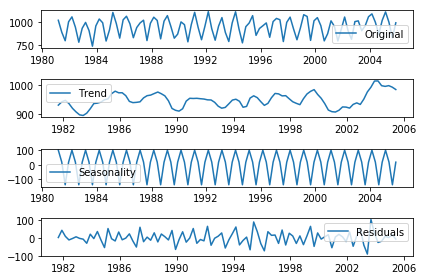

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexdatasales)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexdatasales, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

Dari grafik diatas terlihat bahwa seasonal pada data dan residuals nya bersifat acak.

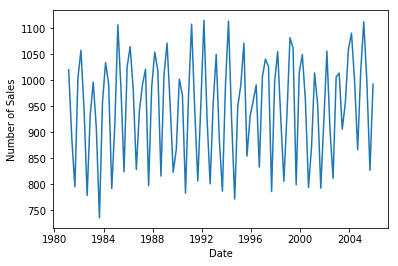

In [16]:
#Plot Graph of Datesales by datetime

plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.plot(indexdatasales)

Dari grafik tersebut terlihat bahwa data sales mengalami fluktuasi naik turun sepanjang waktu dan terlihat bahwa data sales sudah stationer terhadap mean dan varinasi.
Akan tetapi, untuk menguatkan asumsi kita dapat digunakan rolling statistic dan uji ADF test.

In [17]:
#Rolling Statistics
#Determing rolling statistics

rolmean = indexdatasales.rolling(window=12).mean()

rolstd = indexdatasales.rolling(window=12).std()
print(rolmean, rolstd)

                 Sales
Date                  
1981-03-01         NaN
1981-06-01         NaN
1981-09-01         NaN
1981-12-01         NaN
1982-03-01         NaN
1982-06-01         NaN
1982-09-01         NaN
1982-12-01         NaN
1983-03-01         NaN
1983-06-01         NaN
1983-09-01         NaN
1983-12-01  918.233333
1984-03-01  919.391667
1984-06-01  928.025000
1984-09-01  927.750000
1984-12-01  920.275000
1985-03-01  924.341667
1985-06-01  927.733333
1985-09-01  931.516667
1985-12-01  939.233333
1986-03-01  944.916667
1986-06-01  951.100000
1986-09-01  958.866667
1986-12-01  957.416667
1987-03-01  953.833333
1987-06-01  956.200000
1987-09-01  956.616667
1987-12-01  962.650000
1988-03-01  958.291667
1988-06-01  961.091667
...                ...
1998-09-01  946.350000
1998-12-01  946.708333
1999-03-01  956.883333
1999-06-01  962.816667
1999-09-01  959.975000
1999-12-01  960.658333
2000-03-01  961.391667
2000-06-01  956.008333
2000-09-01  956.633333
2000-12-01  946.191667
2001-03-01 

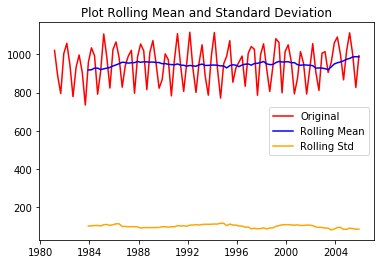

In [18]:
# Plot Rolling Statistics
original=plt.plot(indexdatasales, color='red', label='Original')
mean=plt.plot(rolmean, color='blue', label='Rolling Mean')
std=plt.plot(rolstd, color='orange', label='Rolling Std')
plt.legend(loc='best')
plt.title('Plot Rolling Mean and Standard Deviation')
plt.show(block=False)

Rolling statistics berfungsi untuk mengecek stationeritas data pada mean dan variansi menggunakan plot.
Dari hasil plot rolling mean dan standard deviasi diatas terlihat bahwa data sudah stationer terhadap mean dan variansi.

In [19]:
#Uji ADF test
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexdatasales['Sales'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                 -3.262755
p-value                         0.016628
#Lags Used                      9.000000
Number of Observations Used    90.000000
Critical Value (1%)            -3.505190
Critical Value (5%)            -2.894232
Critical Value (10%)           -2.584210
dtype: float64


Diatas merupakan output hasil uji ADF test. Uji ADF test digunakan untuk apakah data stationer terhadap mean atau tidak.

1. Uji Hipotesis
    H0 : Data tidak stationer terhadap mean
    H1 : Data stationer terhadap mean
2. Tingkat signifikansi
    alpha = 5%
3. Statistik Uji
    p-value = 0.016628
4. Daerah Kritik
    H0 ditolak jika p-value < alpha
5. Kesimpulan
    Karena nilai p-value = 0.016628 < alpha = 0.05 maka H0 ditolak sehingga dapat disimpulkan bahwa data stationer terhadap mean.

Dari kesimpulan uji diatas maka data sudah stationer terhadap mean, dan dari hasil plot rolling statistics tadi terlihat juga data sudah stationer terhadap variansi sehingga data sales ini sudah stationer dalam mean dan variansi. Maka, pada analisis model time series selanjutnya saya gunakan data sales yang asli dan tidak dilakukan treatment apapun.

Karena Data sales sudah stationer terhadap mean dan variansi untuk times series analisis selanjutnya digunakan metode ARIMA (p,d,q), orde p didapatkan dari plot PACF dan orde q didapatkan dari plot ACF, sedangkan orde d (differencing) didapatkan jika kita melakukan differencing data akan tetapi pada kasus ini saya tidak gunakan differencing karena data sales sudah stationer terhadap mean, diffrencing sendiri disini tujuannya untuk membuat data stationer terhadap mean.

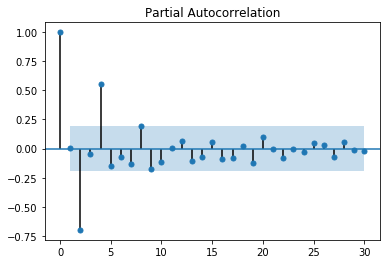

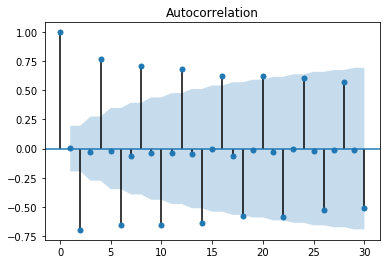

In [20]:
#Get plot Plot PACF and ACF to get order of p and q in Arima time series analysis.
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Plot PACF
#Gt order of p from lags 
plot_pacf(indexdatasales, lags=30)

#Plot acf of q from lags 
plot_acf(indexdatasales, lags=30)
plt.show()

Dari plot tersebut terlihat bahwa pada plot PACF lags cutt of terjadi pada lag ke-5 dan untuk plot ACF mengalami peluruhan menuju nol.
Sehingga, didapatkan order untuk p=5 dan q=0.

Model AR(5)

C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtyp

Plotting AR model
                              ARMA Model Results                              
Dep. Variable:                  Sales   No. Observations:                  100
Model:                     ARMA(5, 0)   Log Likelihood                -541.603
Method:                       css-mle   S.D. of innovations             53.512
Date:                Fri, 06 Sep 2019   AIC                           1097.207
Time:                        07:47:29   BIC                           1115.443
Sample:                    03-01-1981   HQIC                          1104.587
                         - 12-01-2005                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         949.1640      6.775    140.104      0.000     935.886     962.442
ar.L1.Sales     0.1203      0.099      1.221      0.225      -0.073       0.313
ar.L2.Sales    -0.2795      0.

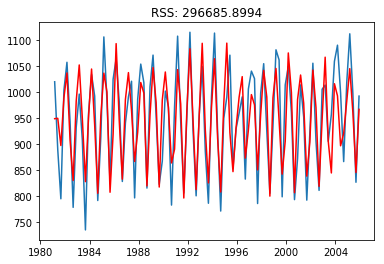

In [21]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexdatasales, order=(5,0,0))
results_AR = model.fit()
plt.plot(indexdatasales)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-indexdatasales['Sales'])**2))
print('Plotting AR model')
print(results_AR.summary())

In [22]:
#Get Predictions of data
predictions_AR = pd.Series(results_AR.fittedvalues, copy=True)
predictions_AR

Date
1981-03-01     949.164031
1981-06-01     949.881840
1981-09-01     897.537079
1981-12-01     989.702097
1982-03-01    1037.193489
1982-06-01     908.017040
1982-09-01     830.188222
1982-12-01     982.809706
1983-03-01    1052.528089
1983-06-01     949.210722
1983-09-01     827.987311
1983-12-01     950.786247
1984-03-01    1044.709076
1984-06-01     937.296857
1984-09-01     805.636982
1984-12-01     954.483012
1985-03-01    1036.791027
1985-06-01    1000.458692
1985-09-01     807.596889
1985-12-01     919.161206
1986-03-01    1093.601203
1986-06-01     945.250598
1986-09-01     832.760178
1986-12-01     985.956966
1987-03-01    1037.832360
1987-06-01     964.866831
1987-09-01     866.816118
1987-12-01     923.364713
1988-03-01    1018.797809
1988-06-01     998.385052
                 ...     
1998-09-01     800.119701
1998-12-01     989.182233
1999-03-01    1045.786715
1999-06-01     946.153886
1999-09-01     842.518466
1999-12-01     906.034833
2000-03-01    1075.652171
2000-06

C:\Users\faizah064287\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([1073.94333932,  961.79232711,  829.56151283,  970.66417085,
       1053.61737945,  949.99760127,  843.02499321,  962.95822633,
       1040.94893101,  945.9695545 ,  856.86801477,  959.54500843,
       1030.46207894,  944.44505817,  869.03094154,  957.66027291,
       1021.07371266,  943.90112447,  879.44582145,  956.44514447,
       1012.60482269,  943.80974187,  888.37319412,  955.57413637,
       1005.01435958,  943.94608511,  896.06884764,  954.89912923,
        998.25795674,  944.19840717,  902.73690359,  954.34417988,
        992.27470943,  944.50620642,  908.53653403,  953.86784837,
        986.99461555,  944.8354794 ,  913.59403424,  953.44679089,
        982.34583805,  945.16691975,  918.01208126,  953.06755914,
        978.25916022,  945.48965343,  921.8759709 ,  952.72219377,
        974.67025678,  945.79772801,  925.25774843,  952.40578347,
        971.52062126,  946.08809287,  928.21900224,  952.11510089,
        968.75773899,  946.35941994,  930.81282349,  951.84784

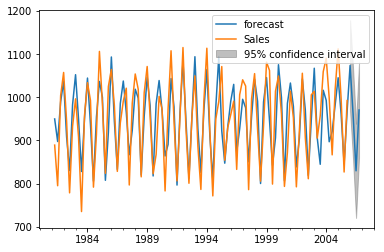

In [28]:
results_AR.plot_predict(1,103)
x=results_AR.forecast(steps=103)
x[0]

Diatas adalah hasil forecast untuk 4 kuartal ke depan pada tahun 2006.

In [ ]:
#Measurement of MSE and MAPE 

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse=mean_squared_error(indexdatasales, predictions_AR)

In [ ]:
mse

In [ ]:
rmse=np.sqrt(mse)
rmse

In [ ]:
mape=mean_absolute_error(indexdatasales, predictions_AR)
mape

Kesimpulannya:
Saya gunakan model ARIMA (5,0,0) untuk memprediksi nilai sales pada tahun 2006. Sebelumnya saya telah melakukan analisis times series arima dengan model logaritma dan model sarima menghasilkan nilai mse dan mape lebih besar. Maka, sesuai dengan model yang dijelaskan di plot ACF dan PACF saya menggunakan model ini untuk menentukan prediksi sales pada tahun 2006. Kuartal 1 = 950.1469668 , kuartal 2 = 953.73952671,  kuartal 3 = 948.23137469,  kuartal 4 = 944.88167369.
